# Planejamento Fatorial Fracionário

O experimento consiste na determinação de Arsênio (As) em pasta de camarão.

O objetivo é maximizar as condições de preparação das amostras.

Para determinação de As, foi utilizado Espectrometria de Absorção Atômica em forno de grafite.

Variáveis estudadas:

Variável 1: Volume de HNO3 (mL), 2 (-1) e 4 (+1)

Variável 2: Volume de H2O2 (mL), 1 (-1) e 2 (+1)

Variável 3: Massa de amostra, (g), 0,1 (-1) e 0,5 (+1)

Variável 4: Potência do forno de micro-ondas (MW) (W), 600 (-1) e 1400 (+1)

Variável 5: Tempo de irradiação (min), 5 (-1) e 10 (+1)

Resposta avaliada: Concentração de arsênio.

In [ ]:
#Instalando a biblioteca para gerar a matriz de experimentos
!pip install pydoe2

In [ ]:
import numpy as np
import pandas as pd
import pyDOE2
import matplotlib.pyplot as plt

In [ ]:
#Matriz de experimentos codificado com 5 fatores
matriz = pyDOE2.fracfact('a b c d abcd')

In [ ]:
#Convertendo o array em dataframe
matriz = pd.DataFrame(matriz, columns=['v1', 'v2', 'v3', 'v4', 'v5'])

In [ ]:
#Criando a coluna com a variável resposta
resposta = pd.read_excel('/content/exp_frac.xls')
matriz['resposta'] = resposta['R']

In [ ]:
#Visualizando a matriz codificada
matriz

,v1,v2,v3,v4,v5,resposta
0,-1.0,-1.0,-1.0,-1.0,1.0,3.49
1,1.0,-1.0,-1.0,-1.0,-1.0,3.57
2,-1.0,1.0,-1.0,-1.0,-1.0,3.56
3,1.0,1.0,-1.0,-1.0,1.0,3.44
4,-1.0,-1.0,1.0,-1.0,-1.0,1.36
5,1.0,-1.0,1.0,-1.0,1.0,1.85
6,-1.0,1.0,1.0,-1.0,1.0,1.70
7,1.0,1.0,1.0,-1.0,-1.0,1.33
8,-1.0,-1.0,-1.0,1.0,-1.0,3.88
9,1.0,-1.0,-1.0,1.0,1.0,3.68




---


# Padrão de Confundimento

Possuímos 5 variáveis, onde a quinta é a interação entre as 4 primeiras.
A geratriz de experimentos é a interação de 5 ordem, 12345.

Os efeitos primários estão confundidos da seguinte forma:

* O efeito 1 está confundido com a interação 2345.
* O efeito 2 está confundido com a interação 1345.
* O efeito 3 está confundido com a interação 1245.
* O efeito 4 está confundido com a interação 1235.
* O efeito 5 está confundido com a interação 1234.

Como podemos ver, os efeitos primários estão confundidos com os efeitos quaternários.

Os efeitos secundários estão confundidos da seguinte forma:

* O efeito 12 está confundido com a interação 345.
* O efeito 13 está confundido com a interação 245.
* O efeito 14 está confundido com a interação 235.
* O efeito 15 está confundido com a interação 234.
* O efeito 23 está confundido com a interação 145.
* O efeito 24 está confundido com a interação 135.
* O efeito 25 está confundido com a interação 134.
* O efeito 34 está confundido com a interação 125.
* O efeito 35 está confundido com a interação 124.
* O efeito 45 está confundido com a interação 123.

Como podemos ver, os efeitos secundários estão confundidos os efeitos terciários.

Portanto, somente precisamos analisar os efeitos primários e secundários.

---

# Adicionando efeitos primários

In [ ]:
#Criando variáveis para cada efeito primário

efeito1 = matriz['v1'] * matriz['resposta']
efeito2 = matriz['v2'] * matriz['resposta']
efeito3 = matriz['v3'] * matriz['resposta']
efeito4 = matriz['v4'] * matriz['resposta']
efeito5 = matriz['v5'] * matriz['resposta']

efeitos_primarios = [efeito1, efeito2, efeito3, efeito4, efeito5]

efeitos_1 = pd.concat(efeitos_primarios, axis=1)
efeitos_1.columns = ['efeito1', 'efeito2', 'efeito3', 'efeito4', 'efeitos5']

In [ ]:
matriz = pd.concat([matriz, efeitos_1], axis=1)

# Adicionando os efeitos secundários



In [ ]:
#Criando variáveis para cada efeito secundário

efeito12 = matriz['v1'] * matriz['v2'] * matriz['resposta']
efeito13 = matriz['v1'] * matriz['v3'] * matriz['resposta']
efeito14 = matriz['v1'] * matriz['v4'] * matriz['resposta']
efeito15 = matriz['v1'] * matriz['v5'] * matriz['resposta']
efeito23 = matriz['v2'] * matriz['v3'] * matriz['resposta']
efeito24 = matriz['v2'] * matriz['v4'] * matriz['resposta']
efeito25 = matriz['v2'] * matriz['v5'] * matriz['resposta']
efeito34 = matriz['v3'] * matriz['v4'] * matriz['resposta']
efeito35 = matriz['v3'] * matriz['v5'] * matriz['resposta']
efeito45 = matriz['v4'] * matriz['v5'] * matriz['resposta']

efeitos_secundarios = [efeito12, efeito13, efeito14, efeito15, efeito23, efeito24, efeito25, efeito34, efeito35, efeito45]

efeitos_2 = pd.concat(efeitos_secundarios, axis=1)
efeitos_2.columns = ['efeito12', 'efeito13', 'efeito14', 'efeito15', 'efeito23', 'efeito24', 'efeito25', 'efeito34', 'efeito35', 'efeito45']

In [ ]:
matriz = pd.concat([matriz, efeitos_2], axis=1)

# Calculando os efeitos

In [ ]:
soma = matriz.iloc[:, 6:].sum()
efeitos_brutos = soma / 7.5

In [ ]:
#Ordenando os efeitos

efeitos_brutos = efeitos_brutos.sort_values(ascending=True)

In [ ]:
#Efeitos primários e demais interações
efeitos_brutos

efeito3    -2.113333
efeito45   -0.169333
efeito25   -0.073333
efeito2    -0.070667
efeito23   -0.060000
efeito12   -0.041333
efeito13   -0.030667
efeito34   -0.028000
efeito15   -0.028000
efeito24   -0.006667
efeitos5    0.006667
efeito14    0.012000
efeito1     0.033333
efeito35    0.241333
efeito4     0.260000
dtype: float64

# Gráfico de efeito de cada variável e interação

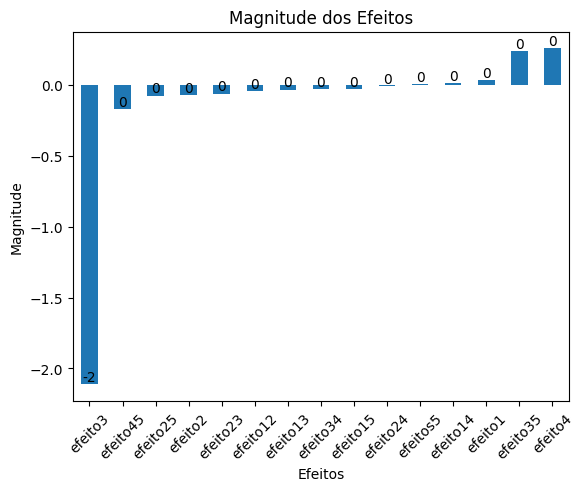

In [ ]:
#Gráfico dos efeitos brutos e as interações de 1 e 2° ordem.
efeitos_brutos.plot(kind='bar')
for i, valor in enumerate(efeitos_brutos):
    plt.text(i, valor, int(valor), ha='center', va='bottom')

plt.xlabel('Efeitos')
plt.ylabel('Magnitude')
plt.title('Magnitude dos Efeitos')
plt.xticks(rotation=45)
plt.show()

# Calculando a porcentagem de cada efeito

In [ ]:
#Elevando os efeitos ao quadrado para retirar o sinal negativo
quadrado_efeitos = efeitos_brutos ** 2

In [ ]:
#Somando todos os efeitos
soma_efeitos = quadrado_efeitos.sum()

In [ ]:
# Definindo a porcentagem de cada efeito
porcentagens = (quadrado_efeitos / soma_efeitos) * 100

In [ ]:
#Colocando as porcentagens em ordem crescente
porcentagens = porcentagens.sort_values(ascending=True)

In [ ]:
porcentagens

efeito24     0.000958
efeitos5     0.000958
efeito14     0.003103
efeito15     0.016896
efeito34     0.016896
efeito13     0.020267
efeito1      0.023945
efeito12     0.036818
efeito23     0.077582
efeito2      0.107619
efeito25     0.115895
efeito45     0.617939
efeito35     1.255150
efeito4      1.456826
efeito3     96.249148
dtype: float64

# Calculando a área da curva e z score para o gráfico de probabilidade dos efeitos

In [ ]:
#Definindo uma curva com 15 partes
zero = 0
incremento = 1/15
elementos = 15

inicio = [zero + i * incremento for i in range(elementos)]

In [ ]:
#Sequência númerica de 15
seq = list(range(1, 16))

final = [num/7 for num in seq]

In [ ]:
# Somando as listas para poder gerar a média
soma_listas = [x + y for x, y in zip(inicio, final)]

In [ ]:
# Média das listas que representa a probabilidade debaixo da curva
ponto_central = [i /2 for i in soma_listas]

In [ ]:
#Calculando a média e desvio padrão
media = np.mean(ponto_central)
std = np.std(ponto_central)

In [ ]:
#Calculando o z score
z = np.round([(i - media) / std for i in ponto_central], decimals=3)

# Gráfico de porcentagem de contribuição dos efeitos e de probabilidade

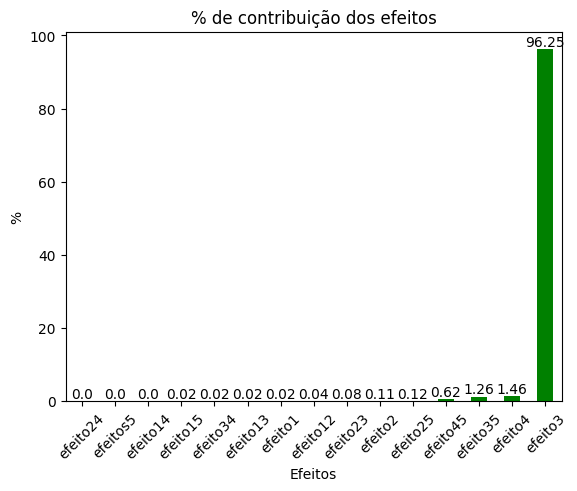

In [ ]:
# Gráfico de contribuição efetiva

porcentagens.plot(kind='bar', color='g')
for i, valor in enumerate(porcentagens):
  plt.text(i, valor, np.float32(round(valor, 2)), ha='center', va='bottom')
plt.xlabel('Efeitos')
plt.ylabel('%')
plt.xticks(rotation=45)
plt.title('% de contribuição dos efeitos')
plt.show()



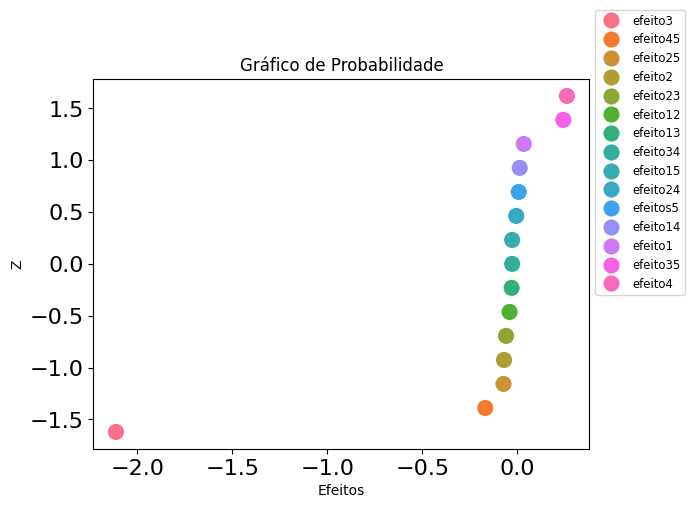

In [ ]:
# Gráfico de probabilidades
import seaborn as sns

prob = sns.scatterplot(x=efeitos_brutos.values, y=z, hue=efeitos_brutos.index, s=100)
prob.set_title('Gráfico de Probabilidade')
prob.set_xlabel('Efeitos')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
prob.set_ylabel('Z')
plt.legend(fontsize='small',  loc='lower left', bbox_to_anchor=(1, 0.4));

In [ ]:
efeitos_brutos

efeito3    -2.113333
efeito45   -0.169333
efeito25   -0.073333
efeito2    -0.070667
efeito23   -0.060000
efeito12   -0.041333
efeito13   -0.030667
efeito34   -0.028000
efeito15   -0.028000
efeito24   -0.006667
efeitos5    0.006667
efeito14    0.012000
efeito1     0.033333
efeito35    0.241333
efeito4     0.260000
dtype: float64

# Refinando o experimento com a inserção de réplicas

Observando o gráfico de contribuição de efeitos e de probabilidade, percebemos que os que mais contribuem são, as variáveis 3, 4, o efeito 35 e o 45. Como efeito 45 tem uma leve consideração, então no refinamento entra também a variável 5.

Excluindo a variável 1 e 2, ficamos com um fatorial 2 k=3, com 8 experimentos.



In [ ]:
matriz2 = matriz[['v3', 'v4', 'v5']]

In [ ]:
matriz2['resposta'] = resposta['R']

* Reorganizando os experimentos, percebemos que possuímos 3 réplicas para cada experimento. Com isso, podemos calcular a média e a variância entre as réplicas, assim como a média das variâncias e podemos estimar o erro do efeito.

In [ ]:
matriz_grouped = matriz2.pivot_table(index=['v3', 'v4', 'v5'], columns=matriz.groupby(['v3', 'v4', 'v5']).cumcount().add(1), values='resposta').reset_index()

# Renomeando as colunas
matriz_grouped.columns.name = None  # Removendo o nome das colunas
matriz_grouped.columns = ['v3', 'v4', 'v5', 'r1', 'r2']  # Renomeando as colunas


In [ ]:
matriz_grouped

,v3,v4,v5,r1,r2
0,-1.0,-1.0,-1.0,3.57,3.56
1,-1.0,-1.0,1.0,3.49,3.44
2,-1.0,1.0,-1.0,3.88,4.03
3,-1.0,1.0,1.0,3.68,3.55
4,1.0,-1.0,-1.0,1.36,1.33
5,1.0,-1.0,1.0,1.85,1.70
6,1.0,1.0,-1.0,1.81,1.71
7,1.0,1.0,1.0,1.90,1.69


* Calculamos agora a média para cada par de réplicas e também a variância para cada par.

O código abaixo calcula a média para cada linha e a variância para cada linha, para então claular a média geral e variância geral.

In [ ]:
#Cálculo das médias e variância das réplicas
media_replicas = matriz_grouped[['r1', 'r2']].mean(axis=1)
var_replicas = matriz_grouped[['r1', 'r2']].var(axis=1)



* Calculando a média das variâncias e o erro experimental

In [ ]:
#Variância experimental
var_exp = np.mean(var_replicas)
print('Variânca experimental:', var_exp)

Variânca experimental: 0.007468750000000016


In [ ]:
#Erro experimental
erro_exp = np.sqrt(var_exp)
print('Erro experimental:', erro_exp)

Erro experimental: 0.08642193008721812


In [ ]:
#Inserindo a resposta média na matriz
matriz_grouped['resposta_media'] = media_replicas

* Com a resposta média, podemos recalcular os efeitos

In [ ]:
matriz_grouped

,v3,v4,v5,r1,r2,resposta_media
0,-1.0,-1.0,-1.0,3.57,3.56,3.565
1,-1.0,-1.0,1.0,3.49,3.44,3.465
2,-1.0,1.0,-1.0,3.88,4.03,3.955
3,-1.0,1.0,1.0,3.68,3.55,3.615
4,1.0,-1.0,-1.0,1.36,1.33,1.345
5,1.0,-1.0,1.0,1.85,1.70,1.775
6,1.0,1.0,-1.0,1.81,1.71,1.760
7,1.0,1.0,1.0,1.90,1.69,1.795


# Recalculando os efeitos

Agora possuimos um fatorial 2 k=3, com efeitos 3 efeitos principais, 2 secundários e um terciário. Além isso, podemos calcular o erro pois temos réplicas.

In [ ]:
#Criando variáveis para cada efeito primário

efeito3_rec = matriz_grouped['v3'] * matriz_grouped['resposta_media']
efeito4_rec = matriz_grouped['v4'] * matriz_grouped['resposta_media']
efeito5_rec = matriz_grouped['v5'] * matriz_grouped['resposta_media']


efeitos_primarios_rec = [efeito3_rec, efeito4_rec, efeito5_rec]

efeitos_1_rec = pd.concat(efeitos_primarios_rec, axis=1)
efeitos_1_rec.columns = ['efeito3', 'efeito4', 'efeito5']

In [ ]:
matriz_grouped = pd.concat([matriz_grouped, efeitos_1_rec], axis=1)

In [ ]:
#Criando variáveis para cada efeito secundário

efeito34_rec = matriz_grouped['v3'] * matriz_grouped['v4'] * matriz_grouped['resposta_media']
efeito35_rec = matriz_grouped['v3'] * matriz_grouped['v5'] * matriz_grouped['resposta_media']
efeito45_rec = matriz_grouped['v4'] * matriz_grouped['v5'] * matriz_grouped['resposta_media']

efeitos_secundarios_rec = [efeito34_rec, efeito35_rec, efeito45_rec]

efeitos_2_rec = pd.concat(efeitos_primarios_rec, axis=1)
efeitos_2_rec.columns = ['efeito34', 'efeito35', 'efeito45']


In [ ]:
matriz_grouped = pd.concat([matriz_grouped, efeitos_2_rec], axis=1)

In [ ]:
#Criando variáveis efeito terciário

efeito345_rec = matriz_grouped['v3'] * matriz_grouped['v4'] * matriz_grouped['v5'] * matriz_grouped['resposta_media']

efeito_terciario_rec = [efeito345_rec]

efeitos_3_rec = pd.concat(efeito_terciario_rec, axis=1)
efeitos_3_rec.columns = ['efeito345']


In [ ]:
matriz_grouped = pd.concat([matriz_grouped, efeitos_3_rec], axis=1)

In [ ]:
soma_rec = matriz_grouped.iloc[:, 6:].sum()
efeitos_brutos_rec = soma_rec / 3.5

In [ ]:
#Ordenando os efeitos

efeitos_brutos_rec = efeitos_brutos_rec.sort_values(ascending=True)

In [ ]:
#Efeitos primários e demais interações
efeitos_brutos_rec

efeito3     -2.264286
efeito34    -2.264286
efeito345   -0.044286
efeito5      0.007143
efeito45     0.007143
efeito4      0.278571
efeito35     0.278571
dtype: float64

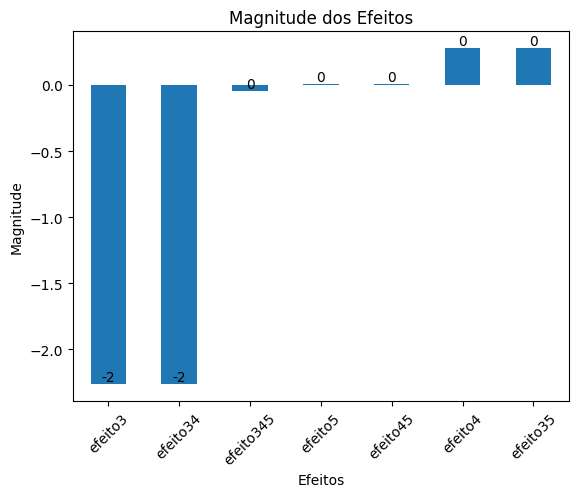

In [ ]:
#Gráfico dos efeitos brutos e as interações de 1, 2 e 3° ordem.
efeitos_brutos_rec.plot(kind='bar')
for i, valor in enumerate(efeitos_brutos_rec):
    plt.text(i, valor, int(valor), ha='center', va='bottom')

plt.xlabel('Efeitos')
plt.ylabel('Magnitude')
plt.title('Magnitude dos Efeitos')
plt.xticks(rotation=45)
plt.show()

# Calculando a porcentagem de cada efeito (refinamento)

In [ ]:
#Elevando os efeitos ao quadrado para retirar o sinal negativo
quadrado_efeitos_rec = efeitos_brutos_rec ** 2


In [ ]:
#Somando todos os efeitos
soma_efeitos_rec = quadrado_efeitos_rec.sum()


In [ ]:
# Definindo a porcentagem de cada efeito
porcentagem_efeitos_rec = (quadrado_efeitos_rec / soma_efeitos_rec) * 100


In [ ]:
#Colocando as porcentagens em ordem crescente
porcentagem_rec = porcentagem_efeitos_rec.sort_values(ascending=True)


# Gráfico de contribuição dos efeitos

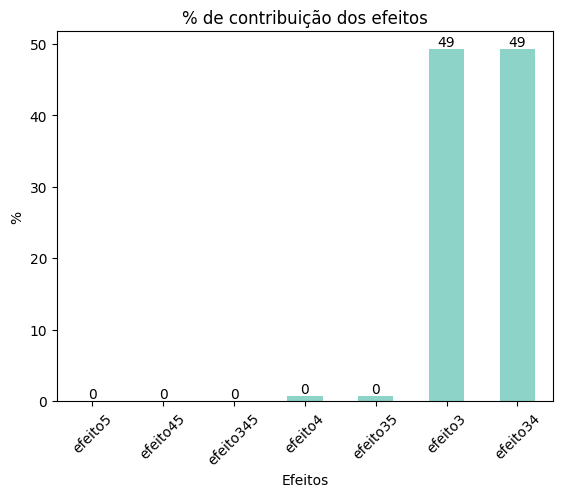

In [ ]:
# Gráfico de contribuição efetiva

porcentagem_rec.plot(kind='bar', color='#8dd3c7')
for i, valor in enumerate(porcentagem_rec):
  plt.text(i, valor, int(valor), ha='center', va='bottom')
plt.xlabel('Efeitos')
plt.ylabel('%')
plt.xticks(rotation=45)
plt.title('% de contribuição dos efeitos')
plt.show()


#Calculando a área e o valor de z

In [ ]:
#Definindo uma curva com 7 partes
zero = 0
incremento = 1/7
elementos = 7

inicio = [zero + i * incremento for i in range(elementos)]

In [ ]:
#Sequência númerica de 7
seq = list(range(1, 8))

final = [num/7 for num in seq]

In [ ]:
# Somando as listas para poder gerar a média
soma_listas = [x + y for x, y in zip(inicio, final)]

In [ ]:
# Média das listas que representa a probabilidade debaixo da curva
ponto_central = [i /2 for i in soma_listas]

In [ ]:
#Calculando a média e desvio padrão
media = np.mean(ponto_central)
std = np.std(ponto_central)

In [ ]:
#Calculando o z score
z = np.round([(i - media) / std for i in ponto_central], decimals=3)

#Calculando o erro

In [ ]:
print('Erro experimental:', erro_exp)

Erro experimental: 0.08642193008721812


In [ ]:
#Erro de um efeito (n * 2^k, onde n é o número de réplicas e k o número de variáveis)

denominador = np.sqrt(2 * (2 ** 3))

In [ ]:
erro_efeito = (2 * erro_exp) / denominador
print('Erro de um efeito:', erro_efeito)

Erro de um efeito: 0.04321096504360906


In [ ]:
#Valor de t. Cada réplica possui 1 grau de liberdade e temos 8 experimentos, então temos 8 graus de liberdade.

from scipy.stats import t

alfa = 0.05

t_tabelado = t.ppf(1 - alfa/2, 8)

print('Valor de t tabelado:', t_tabelado)


Valor de t tabelado: 2.3060041350333704


In [ ]:
#Intervalo de Confiança para o Erro
ic = erro_efeito * t_tabelado
print('IC:', ic)


IC: 0.09964466406934491


#Gráfico de probabilidade com a estimativa do erro

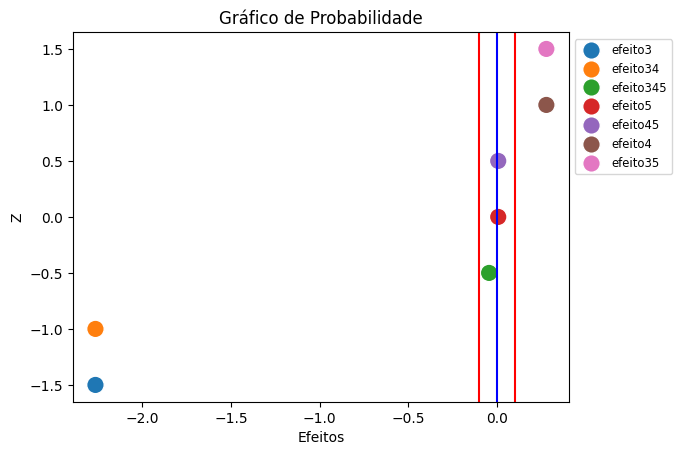

In [ ]:
limite_inferior = 0 - ic
limite_superior = 0 + ic
media = 0

sns.scatterplot(x=efeitos_brutos_rec.values, y=z, hue=efeitos_brutos_rec.index, s=160).set_title('Gráfico de Probabilidade')
plt.axvline(x=limite_inferior, color='r')
plt.axvline(x=limite_superior, color='r')
plt.axvline(x=media, color='b')
plt.xlabel('Efeitos')
plt.ylabel('Z')
plt.legend(fontsize='small', loc='lower left', bbox_to_anchor=(1, 0.6));



---
#Conclusão

O primeiro passo do planejmaneto foi realizar a triagem. Vimos que a variável 3, 4 e 5 foram as mais significativas. Porém sem erro, nossa afirmação é baseada no visual do gráfico de probabilidade.

Excluindo as 2 variáveis, conseguimos obter réplicas e então refinar o planejamento e com a estimativa do erro do efeito, concluímos que apenas a variável 3 e 4 são importantes, pois a 5 está dentro de intervalo de confiança do erro.

Agora, com apenas essas duas variáveis, podemos refinar ainda mais o planejamento, propondo modelos que possam predizer o valor ótimo da resposta.

Nos próximos notebooks, iremos realizar proposição de modelos e entraremos em outros tipos de planejamento, onde o foco não é realizar mais a triagem de variáveis. Realizaremos teste de curvatura e "caminharemos" na superfície de resposta de forma a otimizar o planejamento.
